# Import Libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings 
warnings.filterwarnings('ignore')


# Loading Dataset

In [119]:
# Load the dataset
df = pd.read_csv("CarPrice_assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Exploratory Data Analysis

In [121]:
# Display basic information
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [122]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

In [123]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preprocessing

In [125]:
#Check Duplicates

df.duplicated().sum()

0

In [126]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [127]:
def preprocess_data(df):
    # Handling missing values
    df.dropna(inplace=True)

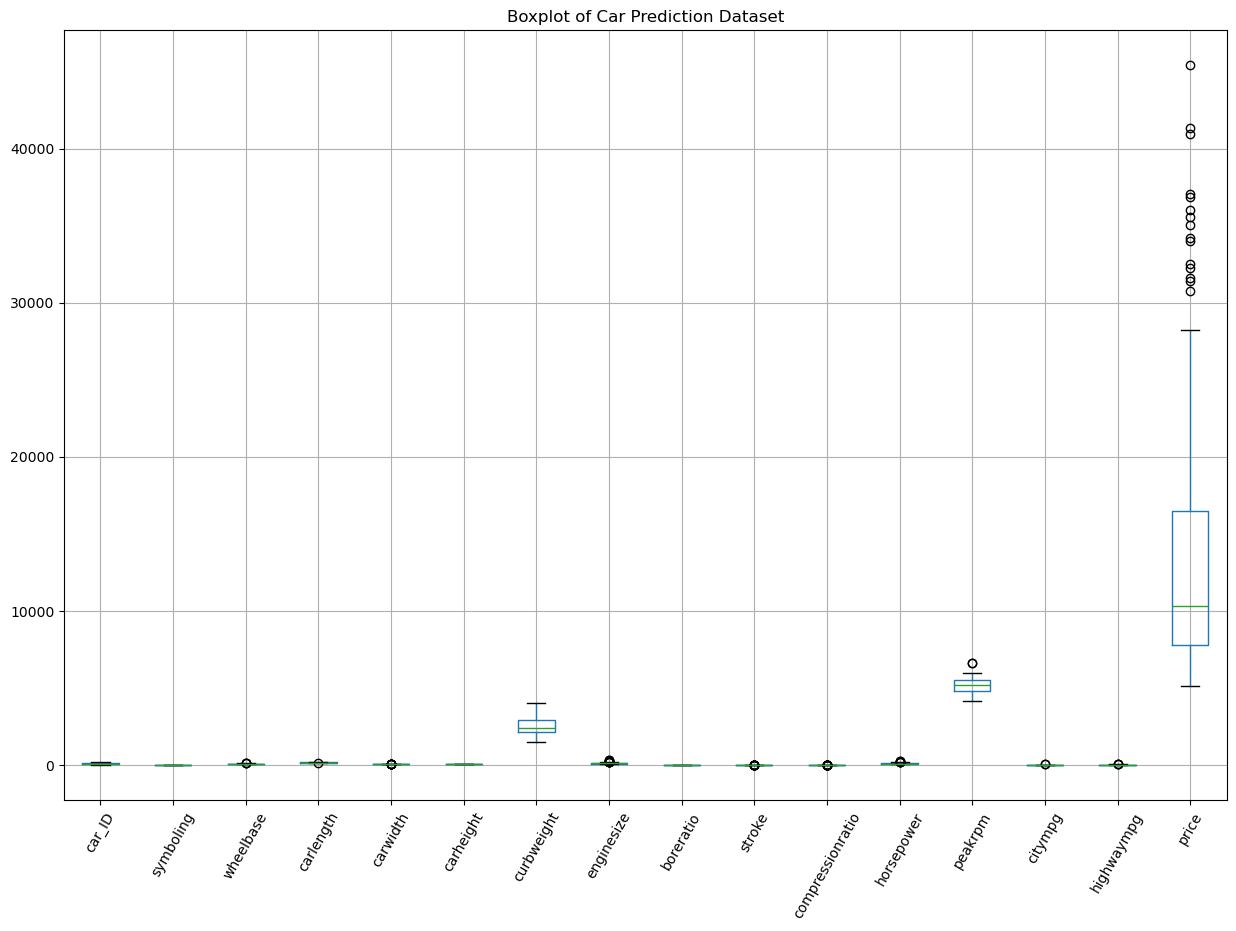

In [128]:
#for columns in numeric_cols:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=60)
plt.title("Boxplot of Car Prediction Dataset")
plt.show()

In [141]:
# Convert categorical columns to numerical
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [143]:
# Split features and target

X = df.drop("price", axis=1)  
y = df["price"]


In [145]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X   

array([[-1.72362229,  1.74347043, -1.83822103, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.70672403,  1.74347043, -1.81377978, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.68982577,  0.133509  , -1.86266229, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.68982577, -1.47645244,  1.53467254, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.70672403, -1.47645244,  1.58355505, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72362229, -1.47645244,  1.60799631, ...,  0.57769233,
        -0.95301169, -0.83719538]])

# Feature Selection
Purpose: 
Reduce irrelevant or redundant features to enhance model performance.
Techniques:
Recursive Feature Elimination (RFE): Iteratively removes least important features based on model performance. 
SelectKBest: Selects the top k features based on statistical tests (e.g., ANOVA, chi-squared).

In [153]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

In [189]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {"R2": r2, "MSE": mse, "MAE": mae}
    
    print(f"{name} Results:")
    print(f"R2 Score: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}\n")

Linear Regression Results:
R2 Score: 0.8441, MSE: 12306121.3029, MAE: 2087.3062

Decision Tree Results:
R2 Score: 0.8793, MSE: 9532215.7769, MAE: 2090.6992

Random Forest Results:
R2 Score: 0.9569, MSE: 3399231.7486, MAE: 1307.7847

Gradient Boosting Results:
R2 Score: 0.9331, MSE: 5282946.9289, MAE: 1597.2791

SVR Results:
R2 Score: -0.1002, MSE: 86850529.7690, MAE: 5696.7073



In [157]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                         R2           MSE          MAE
Linear Regression  0.844116  1.230612e+07  2087.306212
Decision Tree      0.879253  9.532216e+06  2090.699195
Random Forest      0.956941  3.399232e+06  1307.784707
Gradient Boosting  0.933080  5.282947e+06  1597.279091
SVR               -0.100153  8.685053e+07  5696.707303


In [159]:
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R2: {metrics['R2']:.2f}")
    print()

Model Evaluation Results:
Linear Regression:
MSE: 12306121.30
MAE: 2087.31
R2: 0.84

Decision Tree:
MSE: 9532215.78
MAE: 2090.70
R2: 0.88

Random Forest:
MSE: 3399231.75
MAE: 1307.78
R2: 0.96

Gradient Boosting:
MSE: 5282946.93
MAE: 1597.28
R2: 0.93

SVR:
MSE: 86850529.77
MAE: 5696.71
R2: -0.10



# Identify the best-performing algorithm

In [161]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"Best-performing model: {best_model}")


Best-performing model: Random Forest


# Identify the worst-performing algorithm

In [163]:
worst_model = min(results, key=lambda x: results[x]['R2'])
print(f"Worst-performing model: {worst_model}")

Worst-performing model: SVR


# Feature Importance Analysis

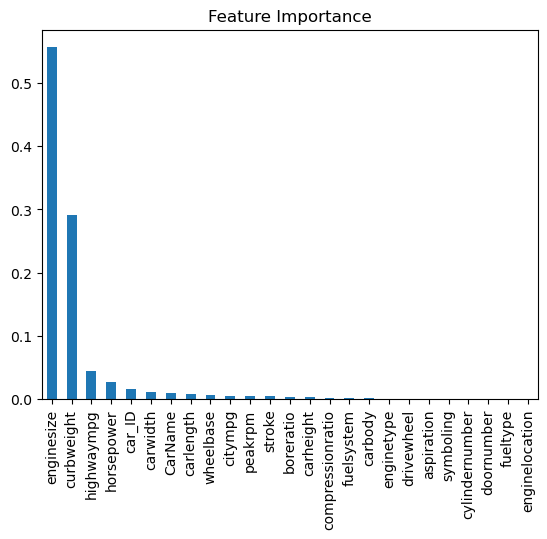

In [193]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=df.drop("price", axis=1).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
plt.show()

# Hyperparameter Tuning for the best model(assuming Random Forest is the best)

In [196]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
y_pred_best = grid_search.best_estimator_.predict(X_test)
print(f"Improved R2 Score: {r2_score(y_test, y_pred_best):.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Improved R2 Score: 0.9570
